# Process examples
A Jupyter notebook to demonstrate usage of the `process` package.

## Motivation
Process is moving away from being a runnable package with a single command-line entry-point to an importable package which can be scripted. This notebook is a good way of demonstrating the functionality of the package, and could provide a better way of working for modellers, who may wish to create their own scripts or notebooks for different tasks.

## Setup
Currently the various classes and "utilities" scripts in Process have different interfaces and read and write files in differing manners and in locations that can't be easily controlled. To partially avoid the headaches associated with this, the code cell below defines a function to allow each example to be run in a temporary directory, much like a test. Input files are copied to this temporary directory and outputs contained there before the directory is removed.

This temporary directory function is only required for running the examples below and removing any modifications afterwards, not in regular use of Process where the outputs will want to be preserved. Further development work will unify these disparate ways of running Process into a common Pythonic form.

In [ ]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
from shutil import copy
from tempfile import TemporaryDirectory

# Define project root dir; when running a notebook, the cwd is the dir the notebook is in
PROJ_DIR = Path.cwd().parent


def copy_to_temp_dir(input_rel):
    """Copy an input file to a new temp dir and return its new path.

    The new TemporaryDirectory object is returned to avoid destruction of the
    object, which results in deletion of the directory prematurely. This way
    the cleanup() method can be used to delete the directory when required.
    :param input_rel: file path relative to project root dir
    :type input_rel: str
    :return: temporary dir and absolute path to file in temp dir
    :rtype: (TemporaryDirectory, pathlib.Path)
    """
    # Create temporary dir to contain the run's outputs
    temp_dir = TemporaryDirectory()
    temp_dir_path = Path(temp_dir.name)

    # Define absolute path for input file
    input_rel_path = Path(input_rel)
    input_abs_path = PROJ_DIR / input_rel_path

    try:
        assert input_abs_path.exists()
    except AssertionError as err:
        raise FileNotFoundError("Input file doesn't exist.") from err

    # Copy input file to temp dir
    copy(input_abs_path, temp_dir_path)
    temp_input_path = temp_dir_path / input_abs_path.name

    return temp_dir, temp_input_path


## Basic run of Process
Run Process on an input file using the `SingleRun` class. This outputs an `MFILE.DAT` and an `OUT.DAT`.

In [ ]:
from process.main import SingleRun

# Define input file name relative to project dir, then copy to temp dir
script_dir = Path("__file__").parent.resolve()
input_rel = script_dir / "data/large_tokamak_IN.DAT"

temp_dir, temp_input_path = copy_to_temp_dir(input_rel)

# Run process on an input file in a temporary directory
single_run = SingleRun(str(temp_input_path))
single_run.run()

The IN.DAT file does not contain any obsolete variables.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
 Version : 3.1.0
 Git Tag : v3.1.0-376-gc862460a
 Git Branch : 3648-remove-annotatedvariable
 Date : 03/06/2025 UTC
 Time : 15:27
 User : clair
 Computer : clair-Precision-3570
 Directory : /home/clair/development/PROCESS/examples
 Input : /tmp/tmpofiyk1ak/large_tokamak_IN.DAT
 Run title : Generic large tokamak
 Run type : Reactor concept design: Pulsed tokamak model model, (c) UK Atomic Energy Authority
 
 ********************************************************************************

/home/clair/development/PROCESS/process/init.py:81: UserWarning: Lower limit of volume averaged electron temperature (te) has been raised to ensure te > teped
  check_process(inputs)
/home/clair/development/PROCESS/process/init.py:81: UserWarning: tmargmin_cs and tmargmin should not both be specified in IN.DAT tmargmin_cs has been ignored
  check_process(inputs)
/home/clair/development/PROCESS/process/physics.py:7199: RuntimeWarning: divide by zero encountered in divide
  * (neped / n_greenwald) ** -0.174
process.pfcoil - WARNING - Ratio of central solenoid overall current density at beginning of flat-top / end of flat-top > 1 (|f_j_cs_start_end_flat_top| > 1)
/home/clair/development/PROCESS/process/costs.py:3130: RuntimeWarning: invalid value encountered in sqrt
  annoam = cost_variables.ucoam[cost_variables.lsa - 1] * np.sqrt(
/home/clair/development/PROCESS/process/costs.py:3199: RuntimeWarning: invalid value encountered in sqrt
  annwst = cost_variables.ucwst[cost_variables.lsa - 1

7 | Convergence Parameter: 3.570E-08
 
 ************************************* PROCESS found a feasible solution **************************************
 
 Warning in routine OCMMNT :
Certain operating limits have been reached,
 as shown by the following iteration variables that are
 at or near to the edge of their prescribed range :

This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF co

## Plot summary
Create a summary PDF of the generated `MFILE.DAT` using `plot_proc`.

In [3]:
import subprocess

from pdf2image import convert_from_path

from process.io import plot_proc

# plot_proc uses command line arguments of the current process. Jupyter adds command line arguments under the hood causing plot_proc to fail. running plot proc in its own process isolates it from the jupyter command line arguments
subprocess.run(["python", plot_proc.__file__, "-f", str(single_run.mfile_path)])

# Create a summary PDF
# Convert PDF to PNG in order to display in notebook
summary_pdf = str(single_run.mfile_path) + "SUMMARY.pdf"
print(summary_pdf)
pages = convert_from_path(summary_pdf)
for page_no, page_image in enumerate(pages):
    png_path = script_dir / f"plot_proc_{page_no + 1}.png"
    page_image.save(png_path, "PNG")

Key 'neutron_power_total' not in MFILE. KeyError! Check MFILE
Key 'fusion_power' not in MFILE. KeyError! Check MFILE
Key 'dt_power_total' not in MFILE. KeyError! Check MFILE
Key 'dd_power' not in MFILE. KeyError! Check MFILE
Key 'dhe3_power' not in MFILE. KeyError! Check MFILE
Key 'alpha_power_total' not in MFILE. KeyError! Check MFILE


/tmp/tmpofiyk1ak/large_tokamak_MFILE.DATSUMMARY.pdf


`plot_proc`'s PDF output.

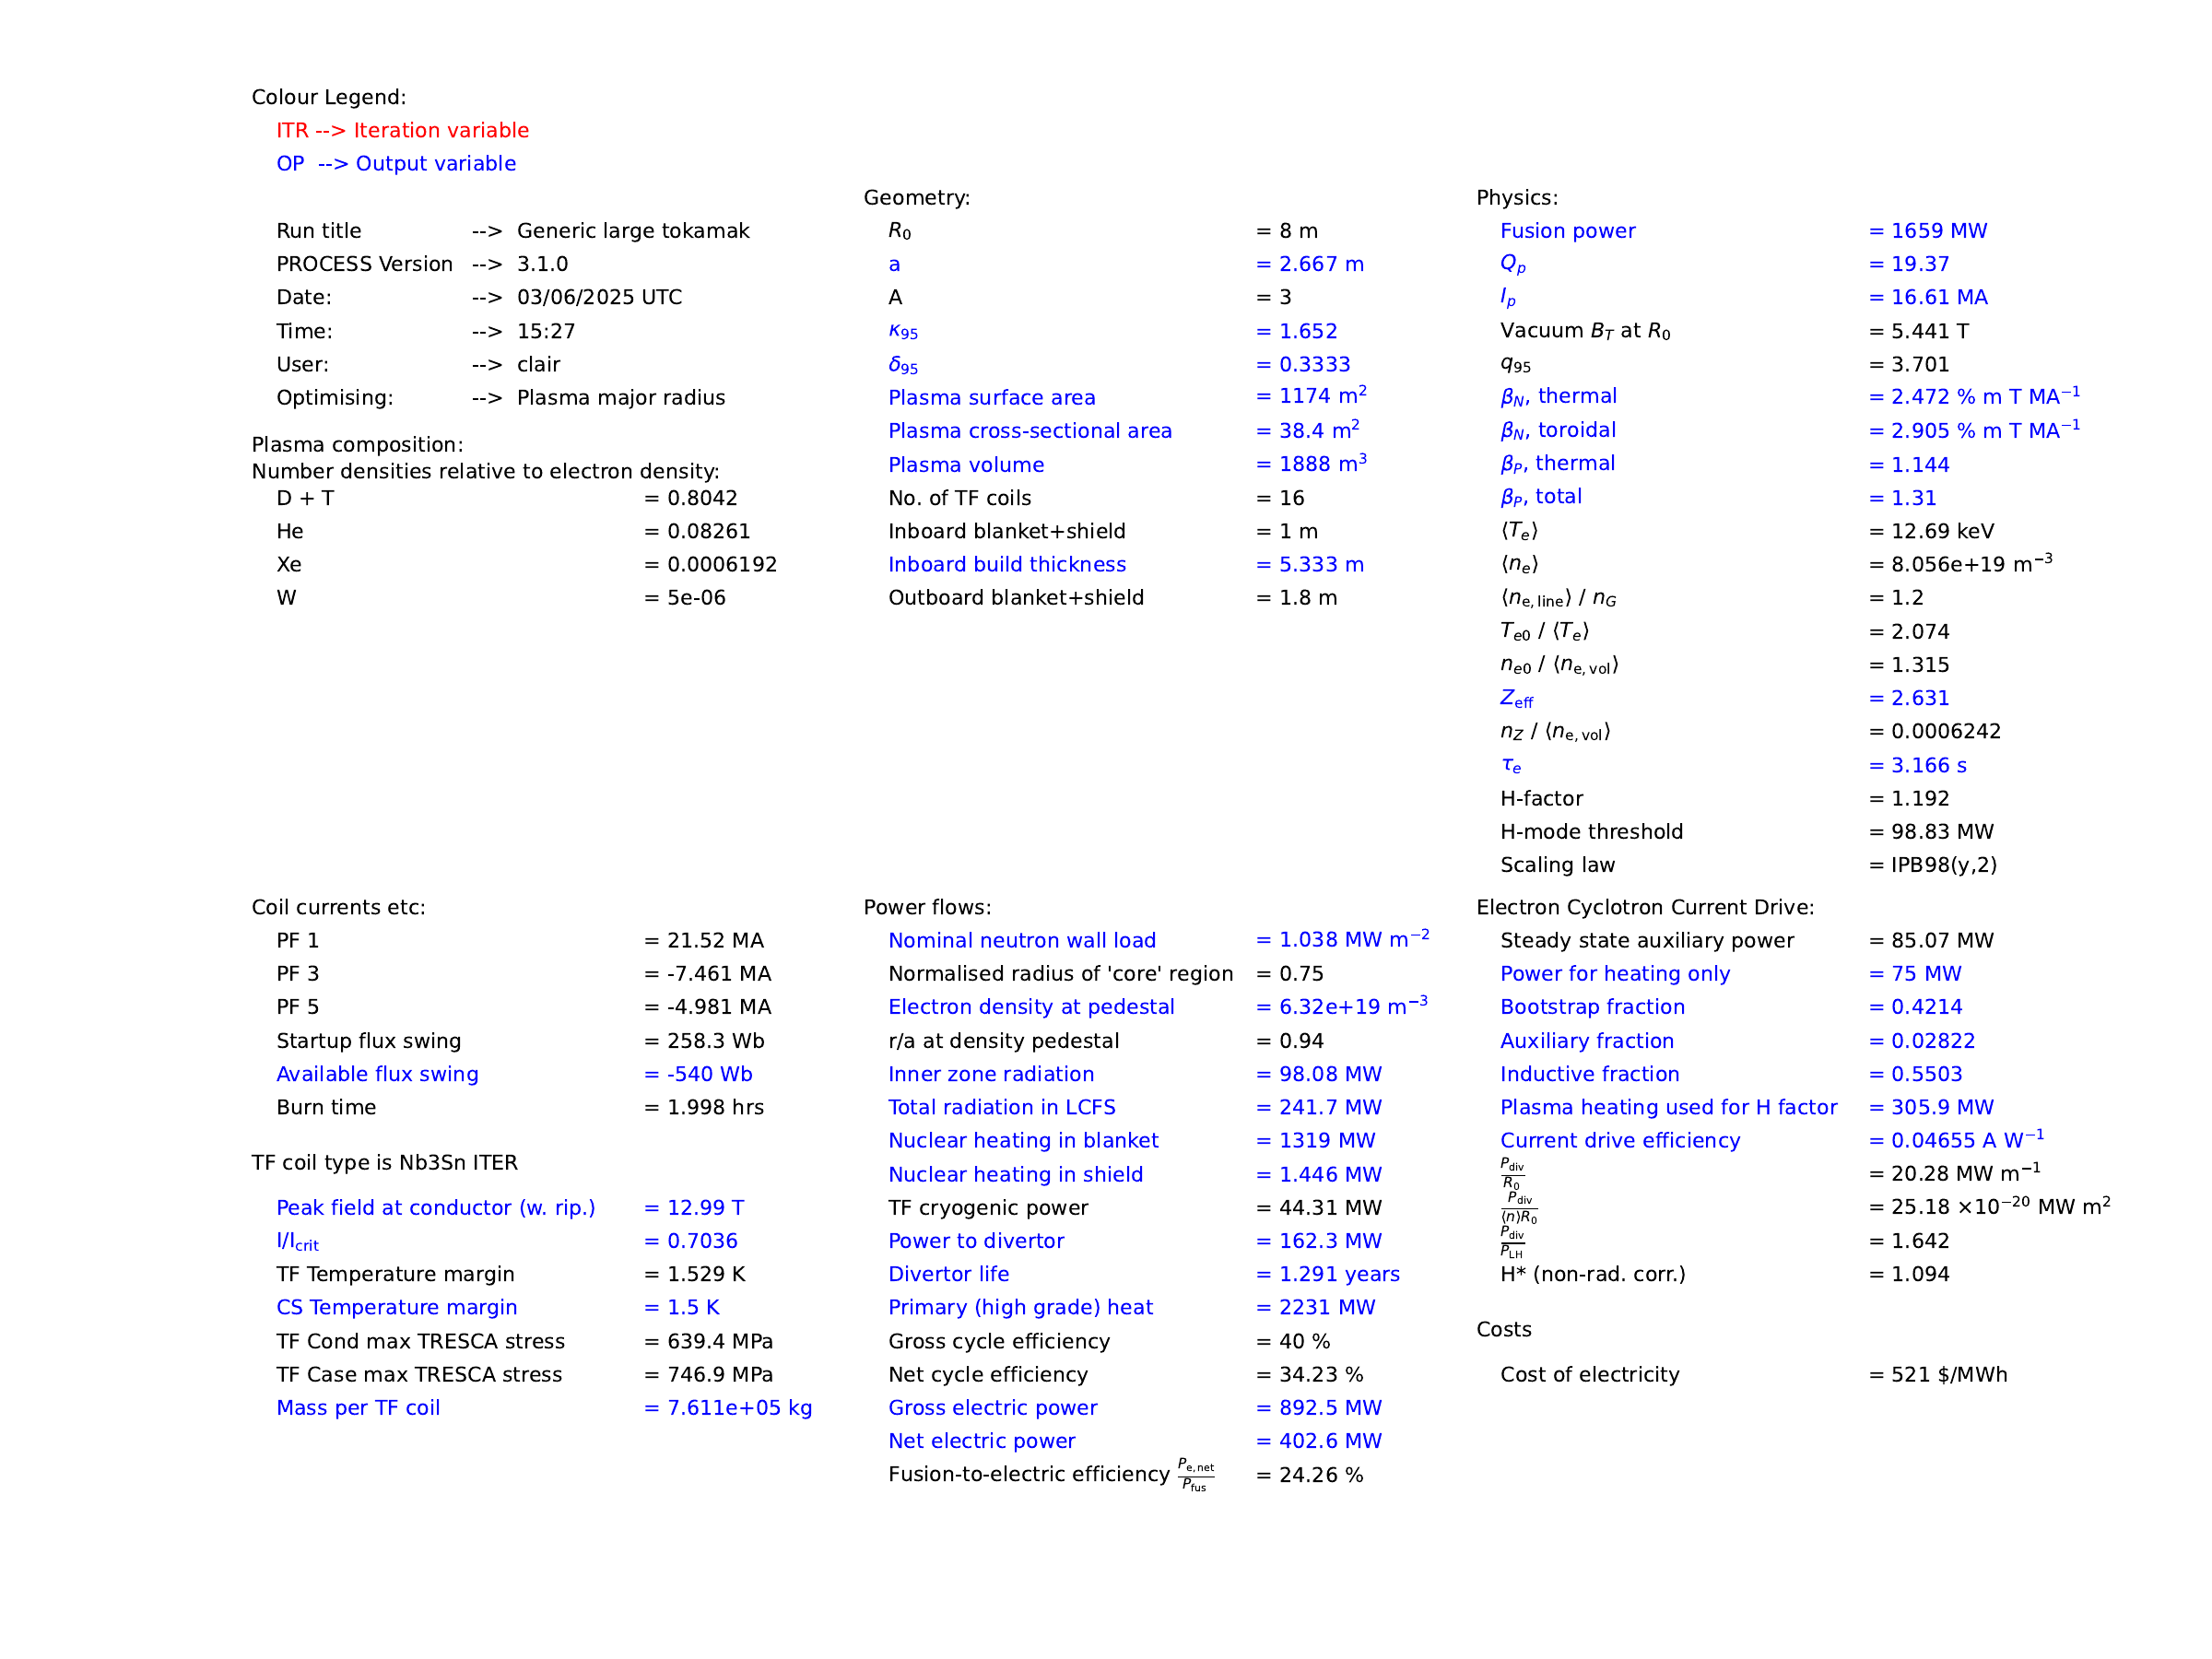

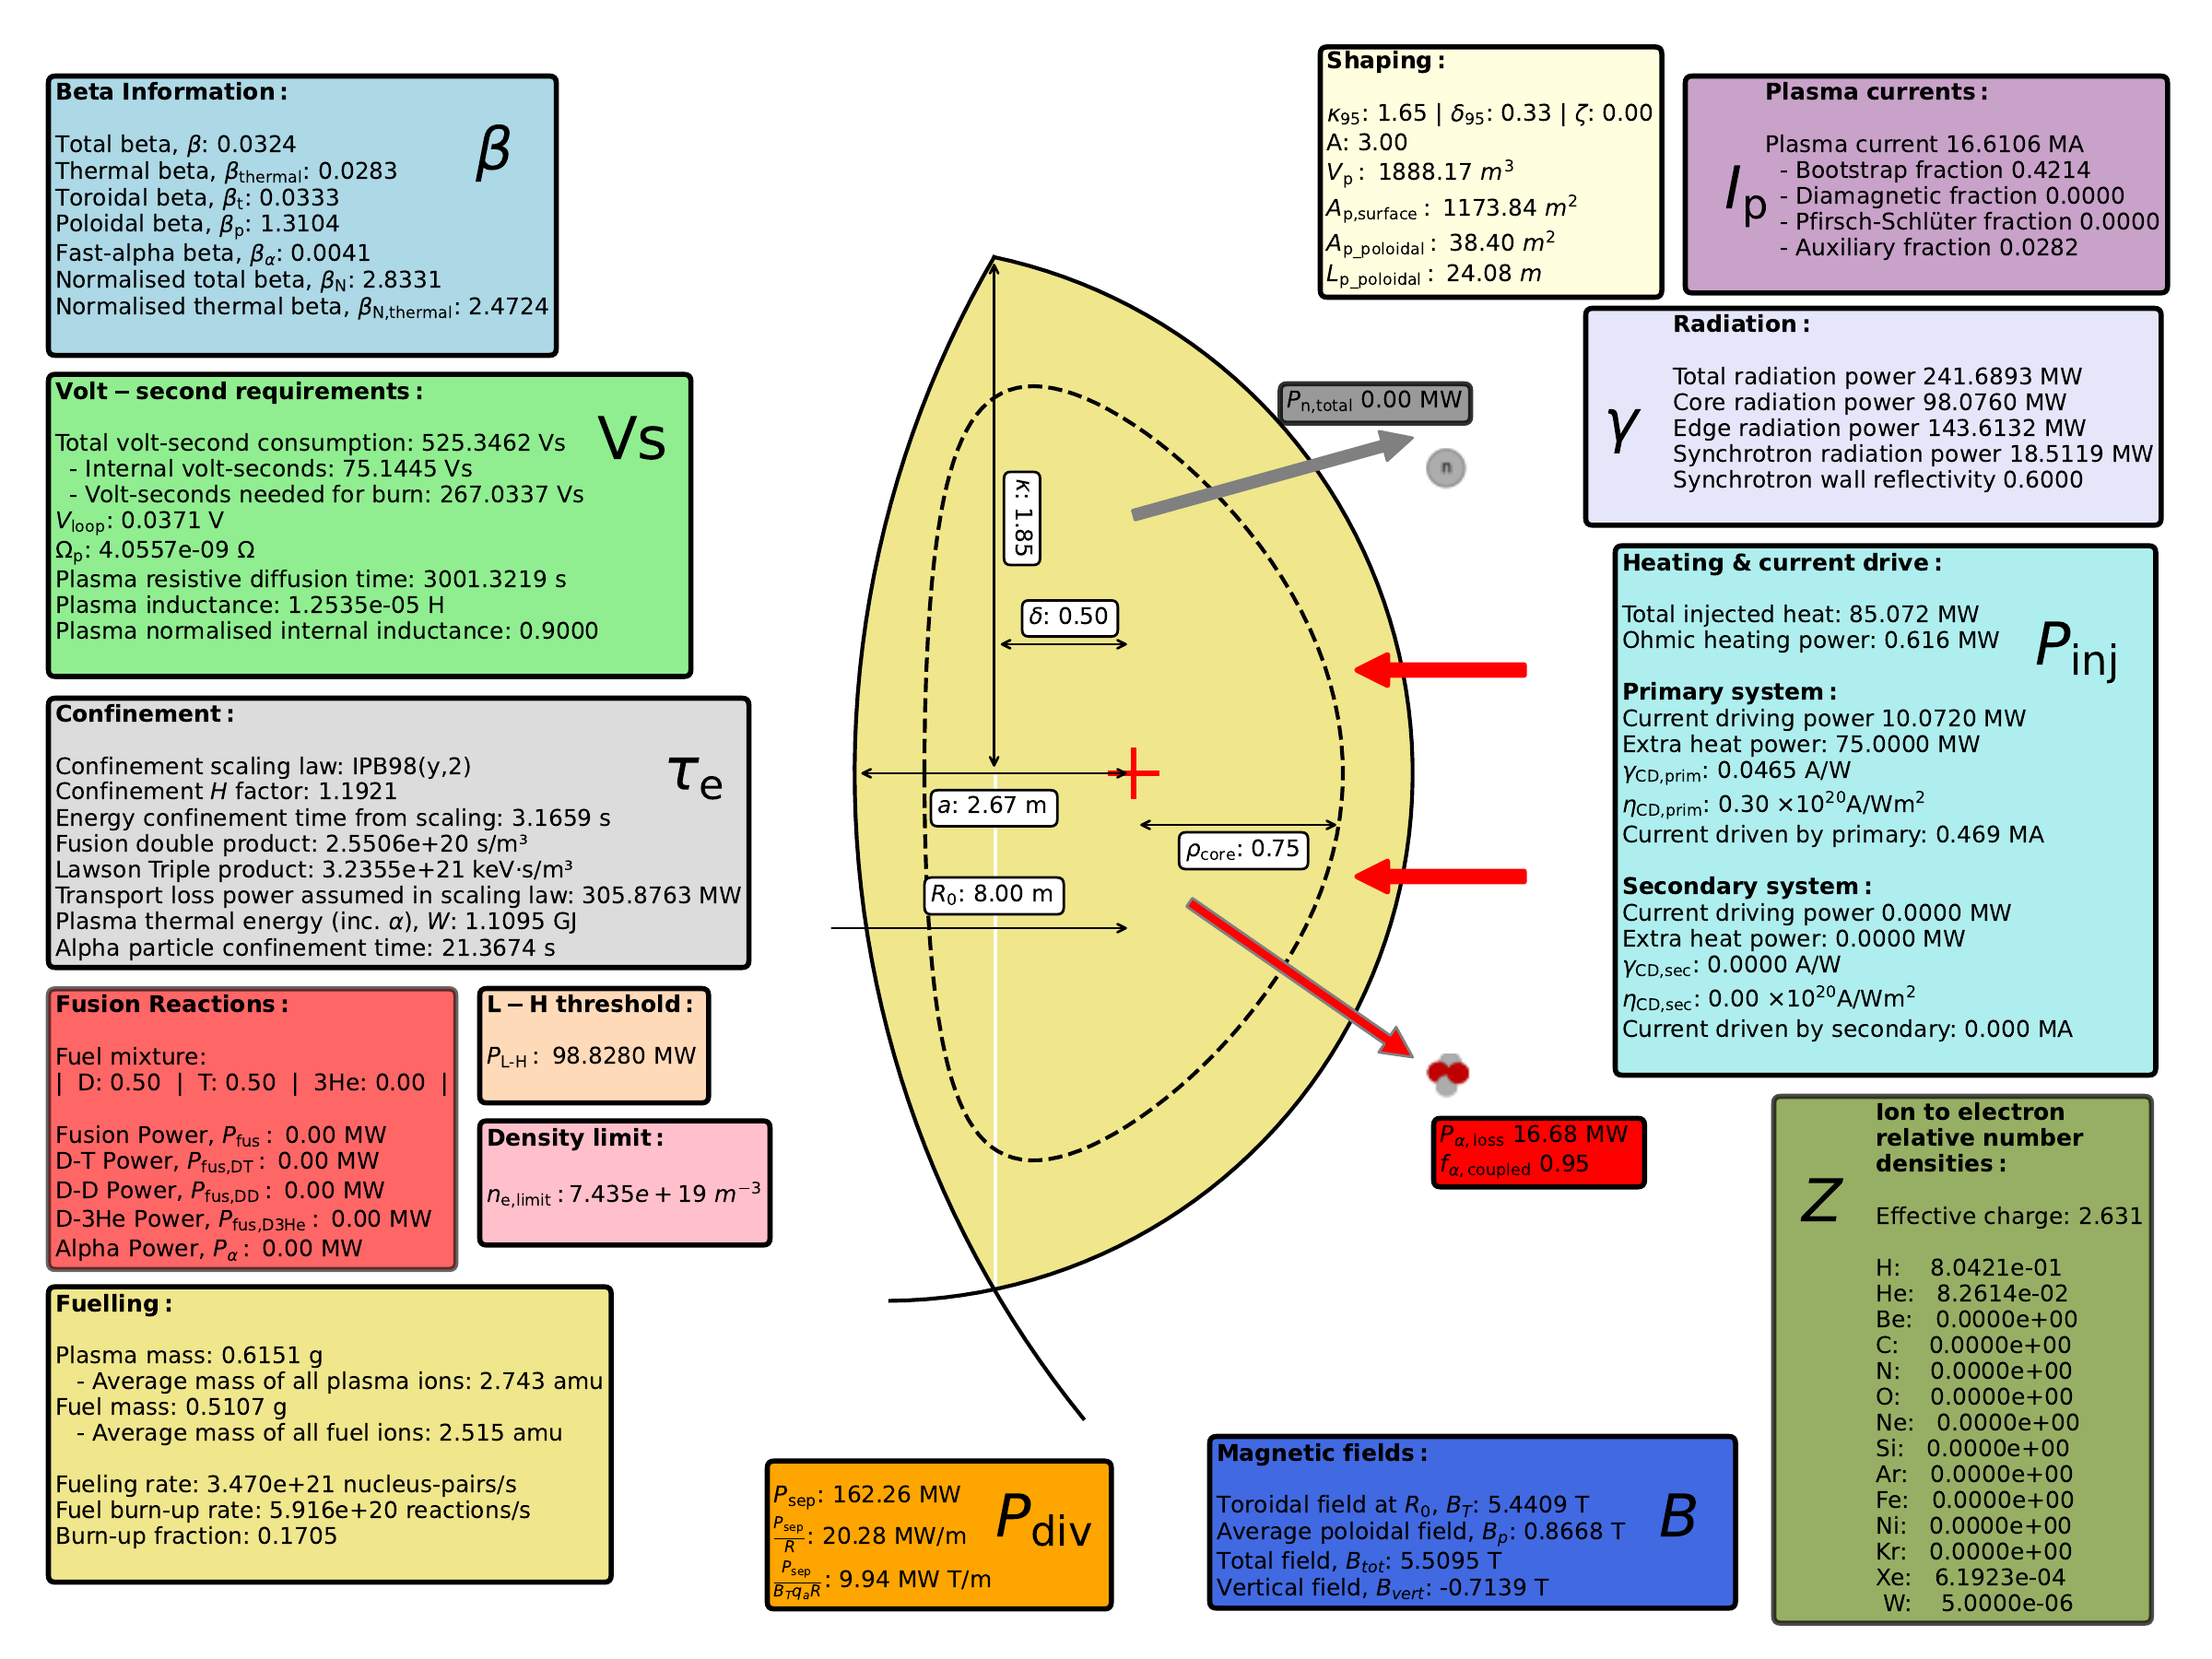

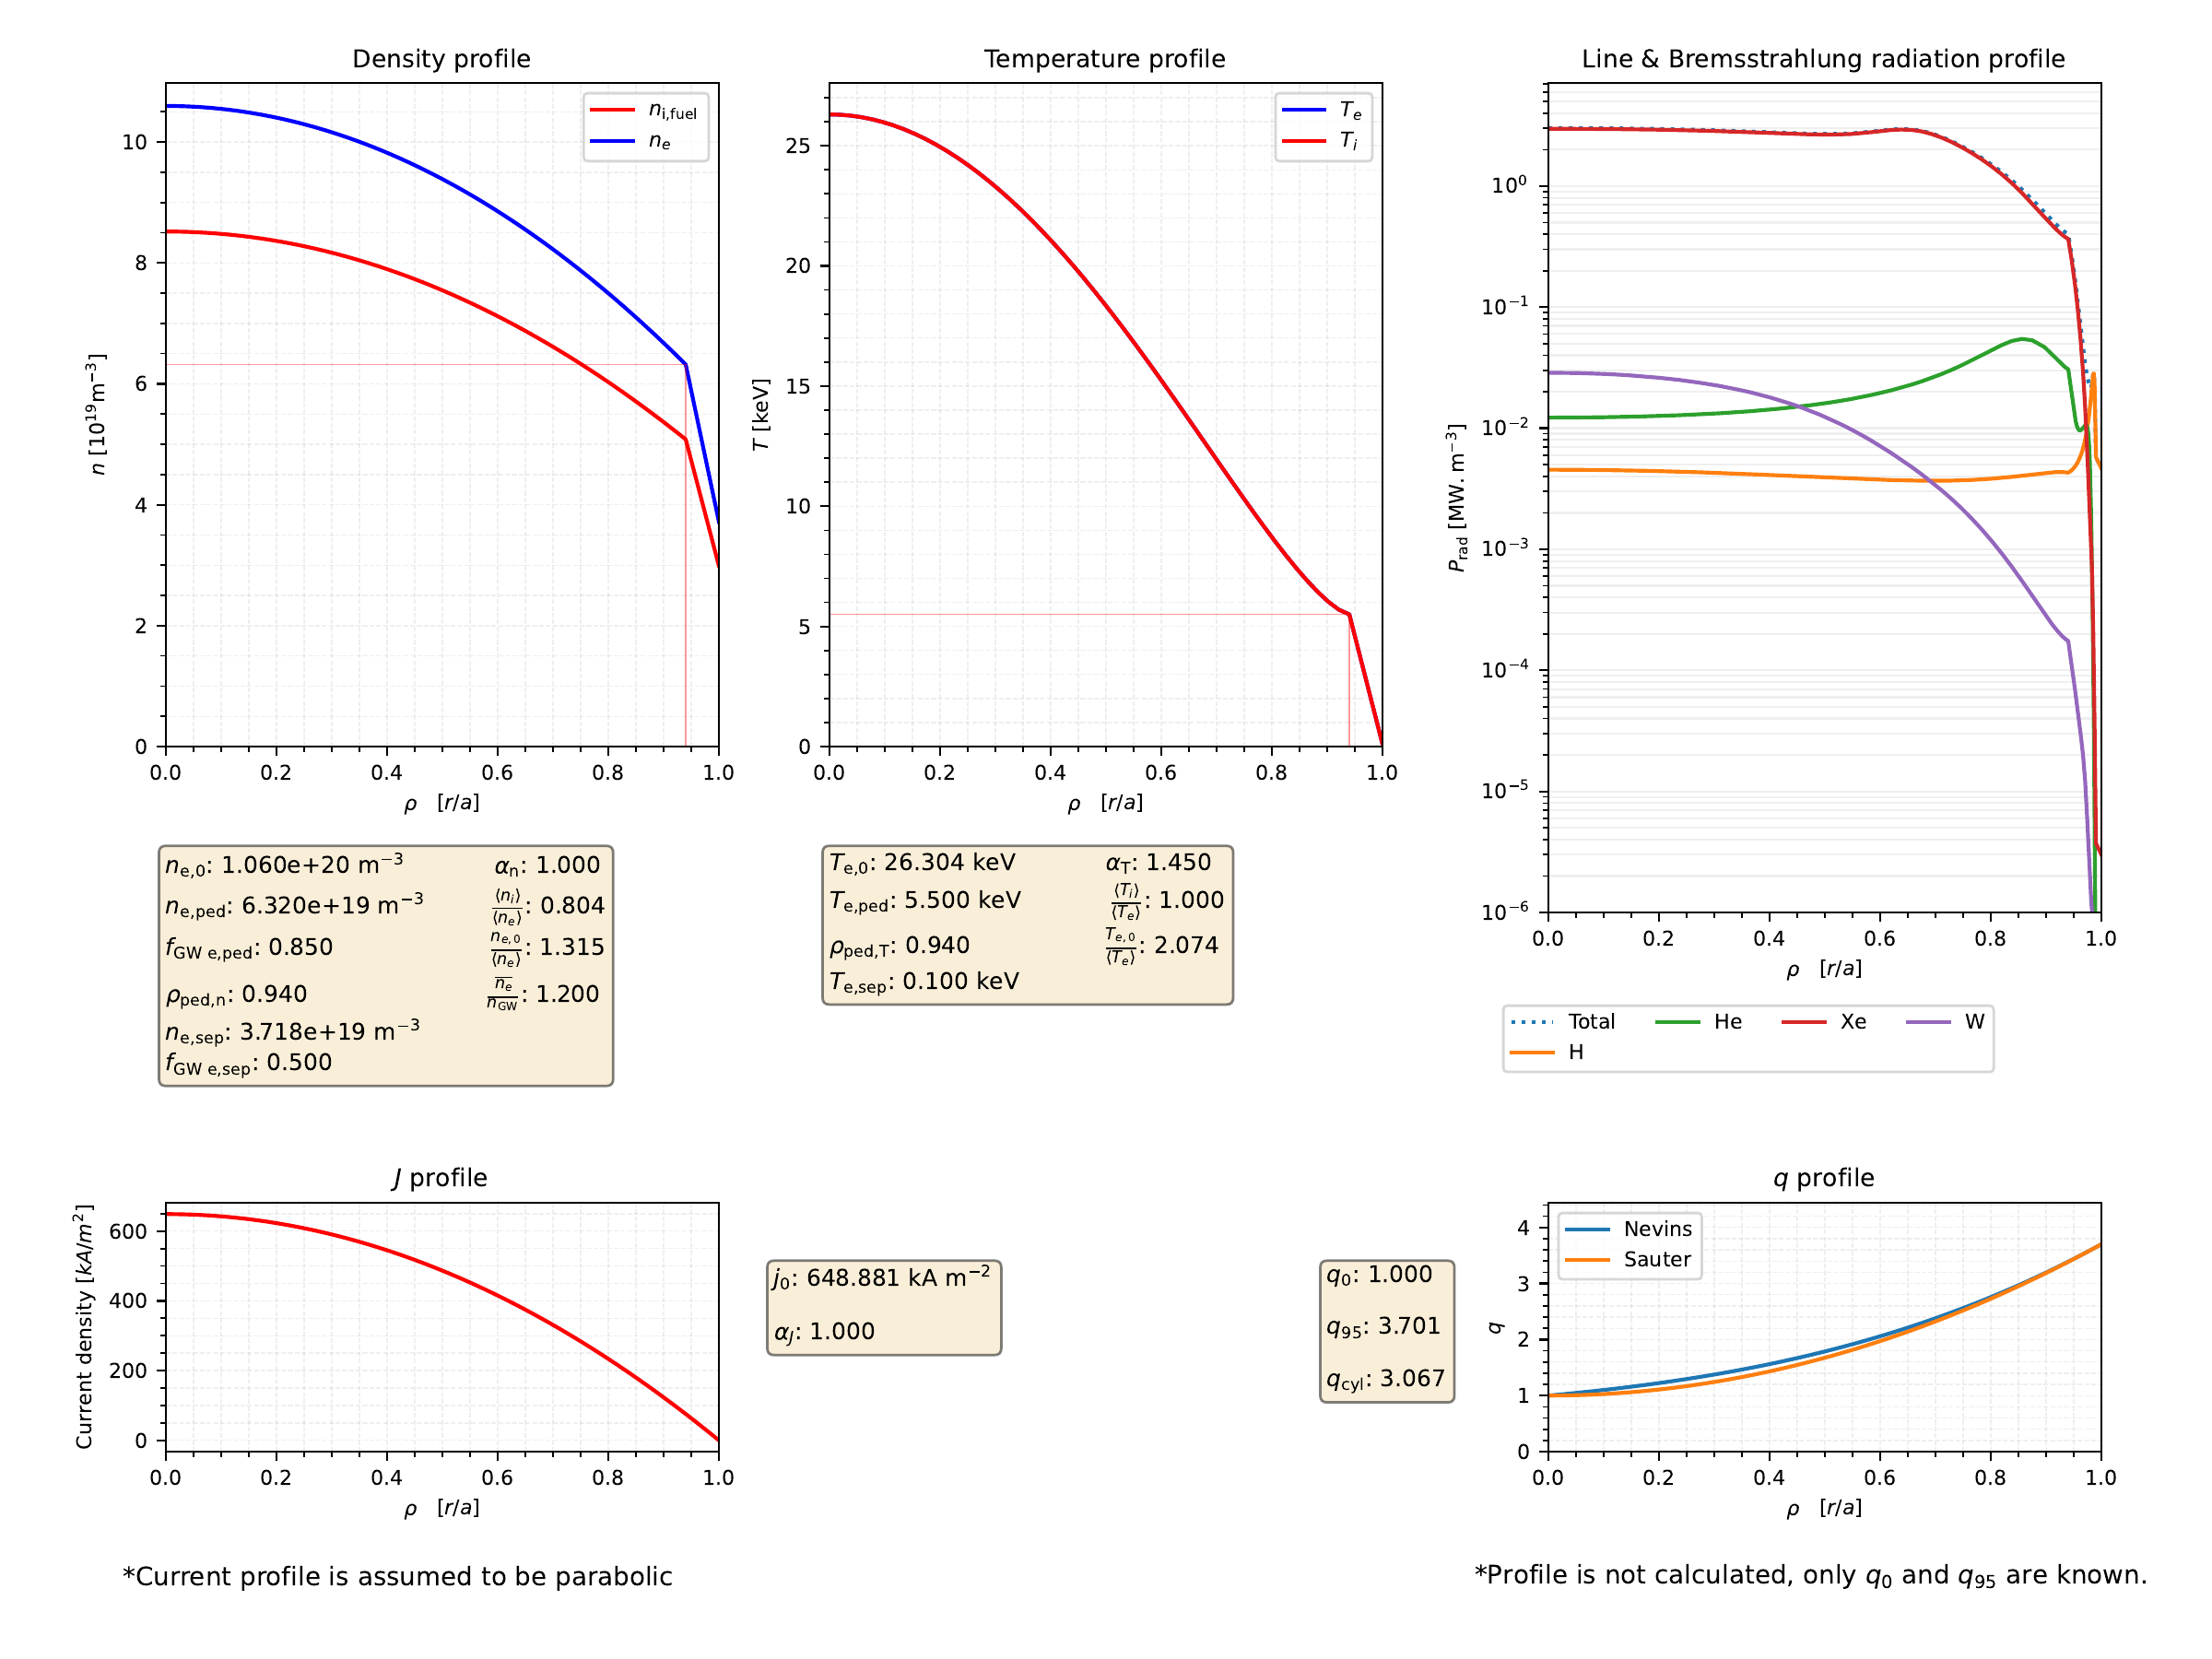

In [4]:
from IPython.display import display  # noqa: A004
from PIL import Image

img1 = Image.open("plot_proc_1.png")
display(img1)
img2 = Image.open("plot_proc_2.png")
display(img2)
img3 = Image.open("plot_proc_3.png")
display(img3)

In [5]:
# Delete temp dir
temp_dir.cleanup()

## View key output variables
Run the large tokamak scenario using `SingleRun` to set some values on the `CostModel` instance and then print them.

In [6]:
# Define input file name relative to project dir
input_rel = script_dir / "data/large_tokamak_IN.DAT"
print(input_rel)
temp_dir, temp_input_path = copy_to_temp_dir(input_rel)

# Run process on an input file
single_run = SingleRun(str(temp_input_path))
single_run.run()

/home/clair/development/PROCESS/process/init.py:81: UserWarning: Lower limit of volume averaged electron temperature (te) has been raised to ensure te > teped
  check_process(inputs)
/home/clair/development/PROCESS/process/init.py:81: UserWarning: tmargmin_cs and tmargmin should not both be specified in IN.DAT tmargmin_cs has been ignored
  check_process(inputs)
/home/clair/development/PROCESS/process/physics.py:7199: RuntimeWarning: divide by zero encountered in divide
  * (neped / n_greenwald) ** -0.174
process.pfcoil - WARNING - Ratio of central solenoid overall current density at beginning of flat-top / end of flat-top > 1 (|f_j_cs_start_end_flat_top| > 1)


/home/clair/development/PROCESS/examples/data/large_tokamak_IN.DAT
The IN.DAT file does not contain any obsolete variables.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
 Version : 3.1.0
 Git Tag : v3.1.0-376-gc862460a
 Git Branch : 3648-remove-annotatedvariable
 Date : 03/06/2025 UTC
 Time : 15:28
 User : clair
 Computer : clair-Precision-3570
 Directory : /home/clair/development/PROCESS/examples
 Input : /tmp/tmppn90fqta/large_tokamak_IN.DAT
 Run title : Generic large tokamak
 Run type : Reactor concept design: Pulsed tokamak model model, (c) UK Atomic Energy Authority
 
 *************

/home/clair/development/PROCESS/process/costs.py:3130: RuntimeWarning: invalid value encountered in sqrt
  annoam = cost_variables.ucoam[cost_variables.lsa - 1] * np.sqrt(
/home/clair/development/PROCESS/process/costs.py:3199: RuntimeWarning: invalid value encountered in sqrt
  annwst = cost_variables.ucwst[cost_variables.lsa - 1] * np.sqrt(


7 | Convergence Parameter: 3.570E-08
 
 ************************************* PROCESS found a feasible solution **************************************
 
 Warning in routine OCMMNT :
Certain operating limits have been reached,
 as shown by the following iteration variables that are
 at or near to the edge of their prescribed range :

This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF coil, outer thermal shield and gravity support.
This is longer than 110 columns.
 Warning in routine OCMMNT :

*Cryostat roof allowance includes uppermost PF coil and outer thermal shield.
*Cryostat floor allowance includes lowermost PF co

In [12]:
import process.data_structure

# Print some values on the CostModel instance
print(
    f"Heat transport system: {process.data_structure.cost_python_variables.c226:.3e} M$"
)
print(
    f"Electrical plant equipment: {process.data_structure.cost_python_variables.c24:.3e} M$"
)

Heat transport system: 3.339e+02 M$
Electrical plant equipment: 4.082e+01 M$


In [ ]:
# Clean up
temp_dir.cleanup()

## VaryRun
Vary iteration parameters until a feasible solution is found, using the `VaryRun` class.

In [ ]:
import os

from process.main import VaryRun

input_rel = script_dir / "data/run_process.conf"
temp_dir, temp_input_path = copy_to_temp_dir(input_rel)

# .conf file relies on a separate input file too; copy this as well
# TODO This double input file requirement needs to be removed
input_rel_2 = script_dir / "data/large_tokamak_IN.DAT"
copy(PROJ_DIR / input_rel_2, temp_dir.name)

# VaryRun uses process_config.py, which changes the current working directory
# via os.chdir() to the temporary dir. Apart from being bad practice, once the
# temp dir is removed, this causes Path.cwd() (as used in plot_scans.py) to
# throw an exception when trying to return the (now deleted) CWD. Hence it
# needs to be set back after VaryRun()
# TODO Remove the os.chdir() from VaryRun
cwd = Path.cwd()

vary_run = VaryRun(str(temp_input_path))
vary_run.run()
os.chdir(cwd)

temp_dir.cleanup()

## Plot scan
Plot a scanned MFILE.

In [ ]:
from process.io import plot_scans

# Define working directory relative to project dir and input file name
input_rel = script_dir / "data/scan_MFILE.DAT"
temp_dir, temp_input_path = copy_to_temp_dir(input_rel)

plot_scans.main(
    args=[
        "-f",
        str(temp_input_path),
        "-yv",
        "thwcndut",
        "--outputdir",
        str(temp_input_path.parent),
    ]
)

temp_dir.cleanup()